## Exercise 1.3

In this task you’ll programmatically generate digital audio signals. Plot the first 100 samples of each signal you'll obtain in this task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

%matplotlib inline

Generate signal $s_1$ consisting of three sinusoids with frequencies $f_1$, $f_2$ and $f_3$, respectively. The signal has to be 600 milliseconds long, and it should be sampled with sampling frequency $f_s$.

The values of the frequencies are given in table 1.1.

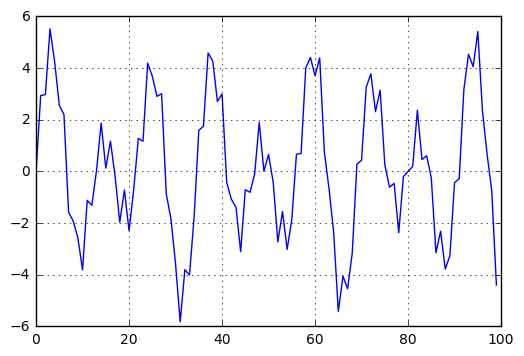

In [2]:
# easier-to-understand version of code

t = 0.6      # duration: 600 milliseconds
fs = 16000   # sampling frequency: 16000 Hz

sample_count = int(t * fs)

# amplitudes:
a1 = 2
a2 = 3
a3 = 1

# frequency components:
f1 = 900
f2 = 1400
f3 = 6100

plot_samples = 100

n = np.arange(sample_count)

s1 = a1 * np.sin(2 * np.pi * n * f1 / fs) + \
     a2 * np.sin(2 * np.pi * n * f2 / fs) + \
     a3 * np.sin(2 * np.pi * n * f3 / fs)

plt.plot(s1[:plot_samples])
plt.grid()

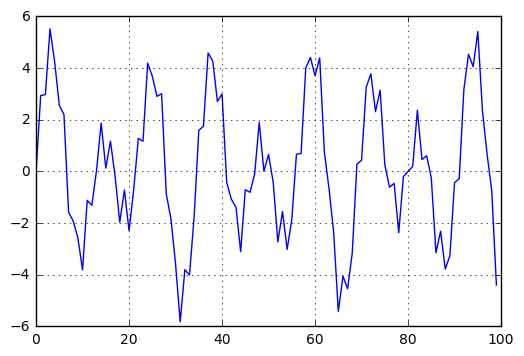

In [3]:
# more "pythonic and numpyish" version:

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal (s1)
n = np.arange(sample_count)

# sum of all (three) sinusoids
s1 = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])

plt.plot(s1[:plot_samples])
plt.grid()

Generate noise signal $s_n$ 600 milliseconds long

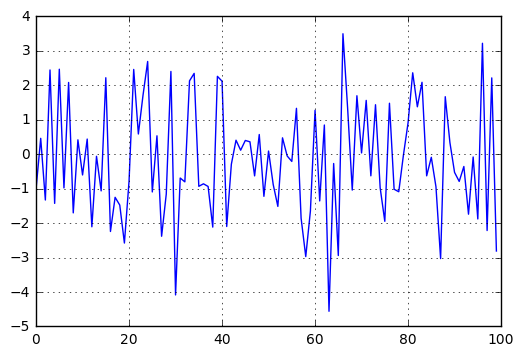

In [4]:
mu = 0
sigma = np.sqrt(max(amps))

sn = np.random.normal(mu, sigma, sample_count)

plt.plot(sn[:plot_samples])
plt.grid()

Superimpose signals $s_1$ and $s_n$ (get the "noisy" version of $s_1$). The resulting signal will be $s_2$

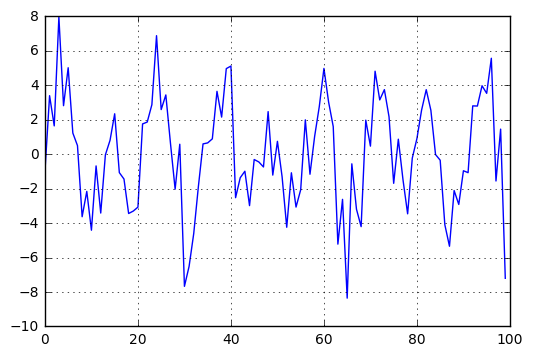

In [5]:
s2 = s1 + sn

plt.plot(s2[:plot_samples])
plt.grid()

Generate signal $s_3$ by shifting $s_1$ by 70 samples (to the right)

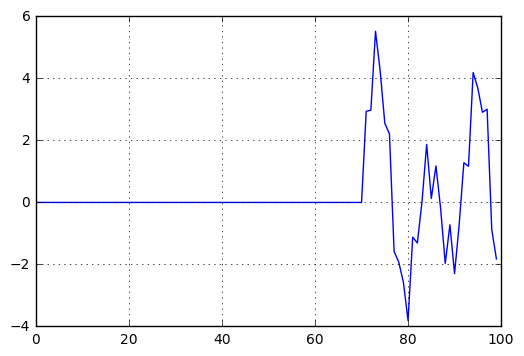

In [6]:
s3 = np.zeros(sample_count)
s3[70:] = s1[:-70]

plt.plot(s3[:plot_samples])
plt.grid()

Generate signal $s_4$. It must be identical to signal $s_1$ except that it has to be sampled at frequency $f_{s_4}$ = 11025 Hz

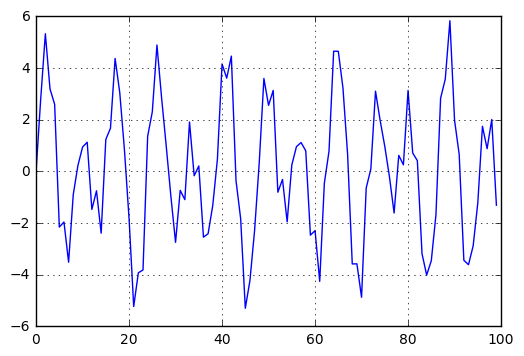

In [7]:
fs4 = 11025

s4 = sum([a * np.sin(2 * np.pi * n * f / fs4) for f, a in zip(freqs, amps)])

plt.plot(s4[:plot_samples])
plt.grid()

Save each signal to WAVE file (set number of channels equal to 1)

In [8]:
MAX_WAVE_AMP = 16384

wav_s1 = np.int16(s1 / max(amps) * MAX_WAVE_AMP)
wav.write('signal.wav', fs, wav_s1)

wav_sn = np.int16(sn / max(amps) * MAX_WAVE_AMP)
wav.write('noise.wav', fs, wav_sn)

wav_s2 = np.int16(s2 / max(amps) * MAX_WAVE_AMP)
wav.write('signal_noisy.wav', fs, wav_s2)

wav_s4 = np.int16(s4 / max(amps) * MAX_WAVE_AMP)
wav.write('resampled.wav', fs4, wav_s4)

Load each signal from the corresponding WAVE file. Listen to signals $s_1$ and $s_4$. Explain the difference

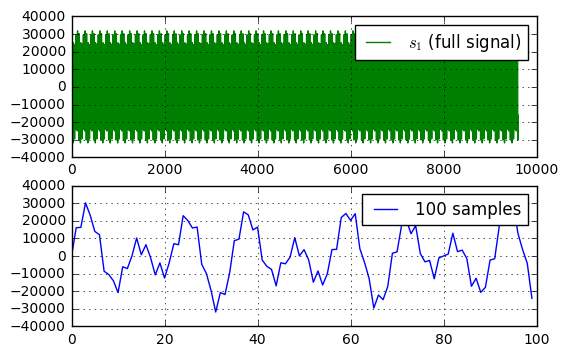

In [9]:
fs, samples = wav.read('signal.wav')

plt.subplot(211)
plt.plot(samples, 'g', label='$s_1$ (full signal)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(samples[:plot_samples], label='{} samples'.format(plot_samples))
plt.legend()
plt.grid()